EDA Technique for
- Clean Noise Data
- Data type conversion (Salary as int)
- Handle Missing Data(Numerical, Catagorical)
- outlier treatement, Univariant Analysis, Bi-Variant analysis, corelations
- split the data into x_i.v & y_dv
- Impetutations after clean Data
- etc


In [208]:
import pandas as pd
df  = pd.read_excel('Rawdata.xlsx') #load Data

In [209]:
pd.__version__

'2.2.3'

In [210]:
df.head()

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year


In [211]:
id(df)

2122991893856

In [212]:
df.columns

Index(['Name', 'Domain', 'Age', 'Location', 'Salary', 'Exp'], dtype='object')

In [213]:
df.shape

(6, 6)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       4 non-null      object
 3   Location  4 non-null      object
 4   Salary    6 non-null      object
 5   Exp       5 non-null      object
dtypes: object(6)
memory usage: 416.0+ bytes


In [215]:
df.isnull()

,Name,Domain,Age,Location,Salary,Exp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,False,False,True,False,False,True
4,False,False,False,True,False,False
5,False,False,False,False,False,False


In [216]:
df.isna()

,Name,Domain,Age,Location,Salary,Exp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,False,False,True,False,False,True
4,False,False,False,True,False,False
5,False,False,False,False,False,False


In [217]:
df.isnull().sum()

Name        0
Domain      0
Age         2
Location    2
Salary      0
Exp         1
dtype: int64

In [218]:
df.isnull().sum().sum()

5

Data Cleaning

In [219]:
df['Name']

0      Mike
1    Teddy^
2     Uma#r
3      Jane
4    Uttam*
5       Kim
Name: Name, dtype: object

In [220]:
df['Name'] = df['Name'].str.replace(r'\W','',regex=True)   # special char replace with ''

In [221]:
df['Name']

0     Mike
1    Teddy
2     Umar
3     Jane
4    Uttam
5      Kim
Name: Name, dtype: object

In [222]:
df

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy,Testing,45' yr,Bangalore,10%%000,<3
2,Umar,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


In [223]:
# same did for remaning columns
df['Domain'] = df['Domain'].str.replace(r'\W','',regex=True)   
df['Age'] = df['Age'].str.replace(r'\W','',regex=True) 
df['Location'] = df['Location'].str.replace(r'\W','',regex=True) 
df['Salary'] = df['Salary'].str.replace(r'\W','',regex=True) 
df['Exp'] = df['Exp'].str.replace(r'\W','',regex=True) 


In [224]:
df

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34years,Mumbai,5000,2
1,Teddy,Testing,45yr,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4yrs
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67yr,NaN,30000,5year
5,Kim,NLP,55yr,Delhi,60000,10


In [225]:
# extract digit only from Age columns
df['Age'] = df['Age'].str.extract('(\d+)') 

In [226]:
df['Age']

0     34
1     45
2    NaN
3    NaN
4     67
5     55
Name: Age, dtype: object

In [227]:
df

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4yrs
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5year
5,Kim,NLP,55,Delhi,60000,10


In [228]:
# same do for exp column
df['Exp'] = df['Exp'].str.extract('(\d+)') 


In [229]:
df #now data is noise free

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [230]:
clean_data = df.copy()

In [231]:
clean_data #start handlinf missing value

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


EDA Technique

In [232]:
clean_data.isnull().sum()

Name        0
Domain      0
Age         2
Location    2
Salary      0
Exp         1
dtype: int64

In [233]:
clean_data['Age']

0     34
1     45
2    NaN
3    NaN
4     67
5     55
Name: Age, dtype: object

In [234]:
import numpy as np
clean_data['Age'] = clean_data['Age'].fillna(np.mean(pd.to_numeric(clean_data['Age'])))

In [235]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50.25,NaN,15000,4
3,Jane,Analytics,50.25,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [236]:
clean_data['Exp'] = clean_data['Exp'].fillna(np.mean(pd.to_numeric(clean_data['Exp'])))

In [237]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50.25,NaN,15000,4
3,Jane,Analytics,50.25,Hyderbad,20000,4.8
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [238]:
clean_data['Location']

0       Mumbai
1    Bangalore
2          NaN
3     Hyderbad
4          NaN
5        Delhi
Name: Location, dtype: object

In [239]:
clean_data['Location'].isnull().sum()

2

In [240]:
clean_data['Location'] = clean_data['Location'].fillna(clean_data['Location'].mode()[0])

In [241]:
clean_data['Location']

0       Mumbai
1    Bangalore
2    Bangalore
3     Hyderbad
4    Bangalore
5        Delhi
Name: Location, dtype: object

In [242]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50.25,Bangalore,15000,4
3,Jane,Analytics,50.25,Hyderbad,20000,4.8
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [243]:
clean_data.isnull().sum() # now no missing value is available 

Name        0
Domain      0
Age         0
Location    0
Salary      0
Exp         0
dtype: int64

In [244]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       6 non-null      object
 3   Location  6 non-null      object
 4   Salary    6 non-null      object
 5   Exp       6 non-null      object
dtypes: object(6)
memory usage: 416.0+ bytes


In [245]:
clean_data['Age'] = clean_data['Age'].astype(int)

In [246]:
clean_data['Salary'] = clean_data['Salary'].astype(int)

In [247]:
clean_data['Exp'] = clean_data['Exp'].astype(int)

In [248]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       6 non-null      int32 
 3   Location  6 non-null      object
 4   Salary    6 non-null      int32 
 5   Exp       6 non-null      int32 
dtypes: int32(3), object(3)
memory usage: 344.0+ bytes


In [249]:
clean_data['Name'] = clean_data['Name'].astype('category')
clean_data['Domain'] = clean_data['Domain'].astype('category')
clean_data['Location'] = clean_data['Location'].astype('category')

In [250]:
clean_data.info()  # data column type is changed as approperate type as age as int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      6 non-null      category
 1   Domain    6 non-null      category
 2   Age       6 non-null      int32   
 3   Location  6 non-null      category
 4   Salary    6 non-null      int32   
 5   Exp       6 non-null      int32   
dtypes: category(3), int32(3)
memory usage: 862.0 bytes


In [251]:
clean_data.to_csv('clean_data.csv') # save clean data

In [252]:
import os
os.getcwd() # current directory

'd:\\study\\python-lab\\lab3\\EDA-Lab-Data-Cleaning'

# EDA TECHNIQUE LETS APPLY

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns


In [254]:
import warnings
warnings.filterwarnings('ignore')

In [255]:
clean_data['Salary']

0     5000
1    10000
2    15000
3    20000
4    30000
5    60000
Name: Salary, dtype: int32

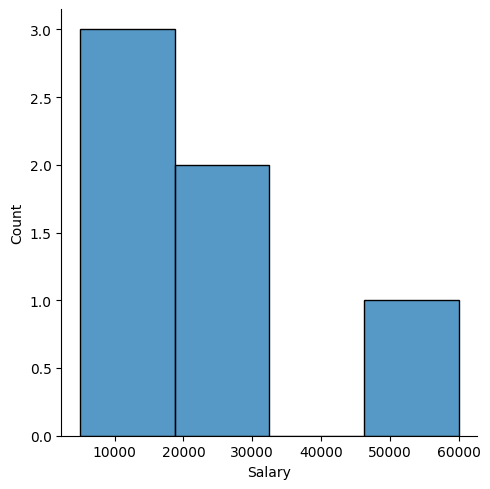

In [256]:
vis1 = sns.displot(clean_data['Salary']) # univariante analysis

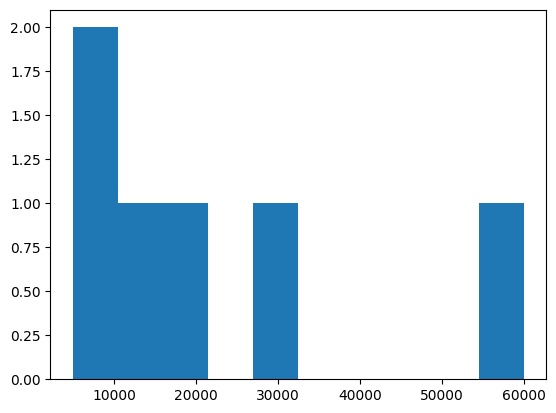

In [257]:
vis2 = plt.hist(clean_data['Salary'])

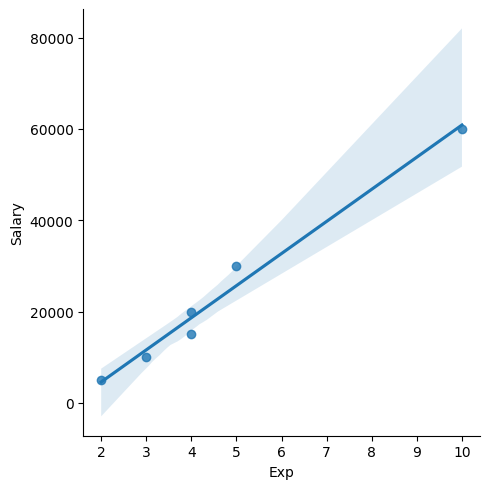

In [258]:
vis4 = sns.lmplot(data=clean_data, x='Exp', y='Salary') # Bi-Variante Analysis

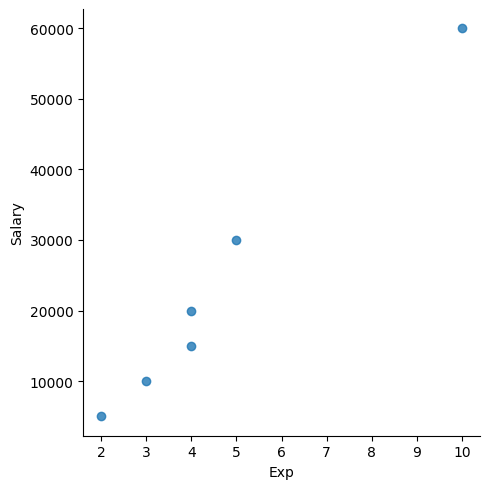

In [259]:
vis5 = sns.lmplot(data=clean_data, x='Exp', y='Salary', fit_reg=False)

Slicing Data

In [260]:
clean_data[:]

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [261]:
clean_data[0:6:2]

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
2,Umar,Dataanalyst,50,Bangalore,15000,4
4,Uttam,Statistics,67,Bangalore,30000,5


In [262]:
clean_data[::-1]

,Name,Domain,Age,Location,Salary,Exp
5,Kim,NLP,55,Delhi,60000,10
4,Uttam,Statistics,67,Bangalore,30000,5
3,Jane,Analytics,50,Hyderbad,20000,4
2,Umar,Dataanalyst,50,Bangalore,15000,4
1,Teddy,Testing,45,Bangalore,10000,3
0,Mike,Datascience,34,Mumbai,5000,2


In [263]:
clean_data.columns

Index(['Name', 'Domain', 'Age', 'Location', 'Salary', 'Exp'], dtype='object')

In [264]:
x_iv = clean_data[['Name', 'Domain', 'Age', 'Location', 'Exp']]  # independent variable

In [265]:
x_iv

,Name,Domain,Age,Location,Exp
0,Mike,Datascience,34,Mumbai,2
1,Teddy,Testing,45,Bangalore,3
2,Umar,Dataanalyst,50,Bangalore,4
3,Jane,Analytics,50,Hyderbad,4
4,Uttam,Statistics,67,Bangalore,5
5,Kim,NLP,55,Delhi,10


In [266]:
y_dv = clean_data[['Salary']] # dependent variable

In [267]:
y_dv

,Salary
0,5000
1,10000
2,15000
3,20000
4,30000
5,60000


In [268]:
df # noise free data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [269]:
clean_data #clean Data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [270]:
x_iv # independent Data

,Name,Domain,Age,Location,Exp
0,Mike,Datascience,34,Mumbai,2
1,Teddy,Testing,45,Bangalore,3
2,Umar,Dataanalyst,50,Bangalore,4
3,Jane,Analytics,50,Hyderbad,4
4,Uttam,Statistics,67,Bangalore,5
5,Kim,NLP,55,Delhi,10


In [271]:
y_dv #dependent Data

,Salary
0,5000
1,10000
2,15000
3,20000
4,30000
5,60000


In [272]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [273]:
imputation = pd.get_dummies(clean_data, dtype=int) # applies impetutations

In [274]:
imputation

,Age,Salary,Exp,Name_Jane,Name_Kim,Name_Mike,Name_Teddy,Name_Umar,Name_Uttam,Domain_Analytics,Domain_Dataanalyst,Domain_Datascience,Domain_NLP,Domain_Statistics,Domain_Testing,Location_Bangalore,Location_Delhi,Location_Hyderbad,Location_Mumbai
0,34,5000,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,45,10000,3,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
2,50,15000,4,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,50,20000,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,67,30000,5,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
5,55,60000,10,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [275]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [276]:
imputation

,Age,Salary,Exp,Name_Jane,Name_Kim,Name_Mike,Name_Teddy,Name_Umar,Name_Uttam,Domain_Analytics,Domain_Dataanalyst,Domain_Datascience,Domain_NLP,Domain_Statistics,Domain_Testing,Location_Bangalore,Location_Delhi,Location_Hyderbad,Location_Mumbai
0,34,5000,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,45,10000,3,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
2,50,15000,4,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,50,20000,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,67,30000,5,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
5,55,60000,10,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


EDA is completed now

Next step : TODO
- we splitn x_iv -- x_train, x_test
- we split y_dv -- y_train, y_test
- build the ml model with x_train & y_train